# Geographical Visualizations

## This script contains:
### 1. Import libraries and data
### 2. Data wrangling
### 3. Data cleaning
### 4. Plotting a choropleth

### 01. Importing libraries and data

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# set matplotlib visuals to appear in the notebook automatically

%matplotlib inline

In [4]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis/02 Data/Prepared Data/us-states.json'

In [5]:
# review JSON file contents

f = open(r'/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis/02 Data/Prepared Data/us-states.json',)

# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
# define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis'

In [7]:
# import preapred air quality data

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','EPA Daily Data with AQI Categories.pkl'))

In [8]:
df.head()

Unnamed: 0  Site Num   Latitude  Longitude    Sample Duration Ozone  \
0           0      10.0  30.497478 -87.880258  8-HR RUN AVG BEGIN HOUR   
1           1      10.0  30.497478 -87.880258  8-HR RUN AVG BEGIN HOUR   
2           2      10.0  30.497478 -87.880258  8-HR RUN AVG BEGIN HOUR   
3           3      10.0  30.497478 -87.880258  8-HR RUN AVG BEGIN HOUR   
4           4      10.0  30.497478 -87.880258  8-HR RUN AVG BEGIN HOUR   

  Pollutant Standard Ozone  Date Local Units of Measure Ozone  \
0        Ozone 8-hour 2015  2022-02-28      Parts per million   
1        Ozone 8-hour 2015  2022-03-01      Parts per million   
2        Ozone 8-hour 2015  2022-03-02      Parts per million   
3        Ozone 8-hour 2015  2022-03-03      Parts per million   
4        Ozone 8-hour 2015  2022-03-04      Parts per million   

  Event Type Ozone  Observation Count Ozone  ...  Observation Count SO2  \
0             None                      1.0  ...                    NaN   
1             None                     17.0  ...                    NaN   
2             None                     17.0  ...                    NaN   
3             None                      9.0  ...                    NaN   
4             None                     17.0  ...                    NaN   

   Observation Percent SO2  Arithmetic Mean SO2  1st Max Value SO2  \
0                      NaN                  NaN                NaN   
1                      NaN                  NaN                NaN   
2                      NaN                  NaN                NaN   
3                      NaN                  NaN                NaN   
4                      NaN                  NaN                NaN   

   1st Max Hour SO2  AQI SO2 Method Code SO2 Method Name SO2     _merge  \
0               NaN      NaN             NaN             NaN  left_only   
1               NaN      NaN             NaN             NaN  left_only   
2               NaN      NaN             NaN             NaN  left_only   
3               NaN      NaN             NaN             NaN  left_only   
4               NaN      NaN             NaN             NaN  left_only   

  AQI Level Ozone  
0            Good  
1            Good  
2        Moderate  
3            Good  
4        Moderate  

[5 rows x 61 columns]

In [9]:
df.shape

(472410, 61)

### 02. Data wrangling

In [14]:
df.columns

Index(['Unnamed: 0', 'Site Num', 'Latitude', 'Longitude',
       'Sample Duration Ozone', 'Pollutant Standard Ozone', 'Date Local',
       'Units of Measure Ozone', 'Event Type Ozone', 'Observation Count Ozone',
       'Observation Percent Ozone', 'Arithmetic Mean Ozone',
       '1st Max Value Ozone', '1st Max Hour Ozone', 'AQI Ozone',
       'Method Code Ozone', 'Method Name Ozone', 'Local Site Name', 'Address',
       'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Sample Duration CO', 'Pollutant Standard CO', 'Units of Measure CO',
       'Event Type CO', 'Observation Count CO', 'Observation Percent CO',
       'Arithmetic Mean CO', '1st Max Value CO', '1st Max Hour CO', 'AQI CO',
       'Method Code CO', 'Method Name CO', 'Sample Duration NO2',
       'Pollutant Standard NO2', 'Units of Measure NO2', 'Event Type NO2',
       'Observation Count NO2', 'Observation Percent NO2',
       'Arithmetic Mean NO2', '1st Max Value NO2', '1st Max Hour NO2',
       'AQI NO2', 'Me

In [15]:
# Select only the necessary columns and put them in a list called columns

columns = ['Arithmetic Mean Ozone',
          'AQI Ozone',
          'State Name']

In [16]:
# Create a subset

ozone_rec = df[columns]

In [17]:
ozone_rec.head()

Arithmetic Mean Ozone  AQI Ozone State Name
0               0.038000       35.0    Alabama
1               0.037235       50.0    Alabama
2               0.038235       51.0    Alabama
3               0.024333       40.0    Alabama
4               0.049647       77.0    Alabama

In [19]:
ozone_rec.shape

(472410, 3)

In [13]:
# check state values and format in data file

df['State Name'].value_counts(dropna=False)

NaN                     130909
California               45978
Texas                    20484
Ohio                     14243
Florida                  12946
Utah                     12442
Arizona                  12304
New York                 12233
Colorado                 12102
Indiana                  11544
North Carolina           10542
Pennsylvania             10357
Illinois                 10335
Iowa                      8368
Wisconsin                 7825
Louisiana                 7467
New Jersey                6901
Missouri                  6867
Wyoming                   6235
New Mexico                6054
Virginia                  5852
Oklahoma                  5835
Nevada                    5818
Maryland                  5801
Georgia                   5549
Michigan                  5210
North Dakota              5157
Kentucky                  5085
Tennessee                 5035
Maine                     4399
Massachusetts             3907
South Carolina            3870
Alabama 

### 03. Data cleaning

In [18]:
# Check for missing values

ozone_rec.isnull().sum()

Arithmetic Mean Ozone    130909
AQI Ozone                130909
State Name               130909
dtype: int64

In [21]:
# drop rows with NaN State Name

ozone_rec = ozone_rec.dropna(subset=['State Name'])

In [22]:
ozone_rec.isnull().sum()

Arithmetic Mean Ozone    0
AQI Ozone                0
State Name               0
dtype: int64

In [23]:
ozone_rec.shape

(341501, 3)

In [25]:
# check for duplicates

dups = ozone_rec.duplicated()

In [26]:
dups.shape # no dups

(341501,)

<Axes: xlabel='AQI Ozone', ylabel='Count'>

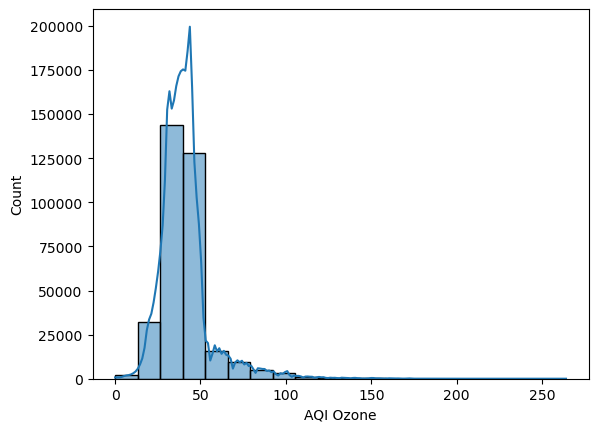

In [28]:
# extreme values check

sns.histplot(ozone_rec['AQI Ozone'], bins=20, kde = True) # shows extreme values for 'AQI Ozone'

No extreme values noted for AQI (AQI over 301 would indicate Hazardous levels, and AQI od 0-50 is normal)

### 04. Plotting a choropleth

In [29]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = ozone_rec[['State Name','AQI Ozone']]
data_to_plot.head()

State Name  AQI Ozone
0    Alabama       35.0
1    Alabama       50.0
2    Alabama       51.0
3    Alabama       40.0
4    Alabama       77.0

In [33]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Configure choropleth map

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State Name', 'AQI Ozone'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBuGn', fill_opacity=0.8, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [34]:
# save html ouput file

map.save('plot_data.html')

#### Discussion

This map shows that Pennsylvania, Missouri, Kansas, and Minnesota have the highest average Ozone AQI values. This is surprising, as I would have suspected states with some of the largest citys, such as New York, California, Texas, and Illinois, to have higher AQI values. 

This does begin to answer questions around which states have better/worse air quality. Based on these results, I want to further investigate the criter gas levels and other AQI values in Pennsylvania, Missouri, Kansas, and Minnesota, and see how they differ from other states. 